# Importing necessary libraries


In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [177]:
# Loading the dataset

salesdata = pd.read_csv("AusApparalSales4thQrt2020.csv")

# Displaying the first few rows of the dataset
salesdata.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Inspecting for Missing or Incorrect Data



In [178]:
# Checking for missing values
missing_values = salesdata.isna().sum()

# Displaying columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


# b. Based on your knowledge of data analytics, include your
recommendations for treating missing and incorrect data (dropping the
null values or filling them).

# Recommendations:

Identifying the missing data patterns, considering the potential causes of errors, and applying appropriate techniques like data imputation (replacing missing values with estimated values), outlier detection and removal, or simply removing problematic data points while carefully considering potential biases introduced by these methods

* Listwise deletion: Remove entire rows containing missing values (only use if missing data is minimal and not biased). 
* Mean/Median imputation: Replace missing values with the mean or median of the variable (use with caution as it can introduce bias, especially for skewed data). 
* Mode imputation: Replace missing categorical values with the most frequent category 

# Handling Missing Data

In [179]:
# Dropping rows with missing values, if there are null values run the below command to drop null values
data_cleaned = salesdata.dropna()
data_cleaned.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Data Normalization


In [180]:

# Normalizing numerical columns
# normalization of the 'Unit' and 'Sales'.
data_normalized = data_cleaned.copy()
data_normalized['Unit'] = (data_normalized['Unit'] - data_normalized['Unit'].min()) / (data_normalized['Unit'].max() - data_normalized['Unit'].min())
data_normalized['Sales'] = (data_normalized['Sales'] - data_normalized['Sales'].min()) / (data_normalized['Sales'].max() - data_normalized['Sales'].min())

data_normalized.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [181]:
# Grouping data by Time and Demographic Group
grouped_data_by_time_and_group = data_normalized.groupby(['Time', 'Group']).agg({
    'Sales': 'sum',
    'Unit': 'sum'
})

print(grouped_data_by_time_and_group)

                        Sales        Unit
Time      Group                          
Afternoon Kids     160.968254  160.968254
          Men      162.650794  162.650794
          Seniors  159.015873  159.015873
          Women    161.222222  161.222222
Evening   Kids     158.111111  158.111111
          Men      159.190476  159.190476
          Seniors  153.126984  153.126984
          Women    161.238095  161.238095
Morning   Kids     161.063492  161.063492
          Men      162.603175  162.603175
          Seniors  161.428571  161.428571
          Women    160.031746  160.031746


In [182]:
# Grouping data by State and Demographic Group
grouped_data_by_state_and_group = data_normalized.groupby(['State', 'Group']).agg({
    'Sales': 'sum',
    'Unit': 'sum'
})

print(grouped_data_by_state_and_group)

                    Sales        Unit
State Group                          
NSW   Kids     109.444444  109.444444
      Men      112.206349  112.206349
      Seniors  106.904762  106.904762
      Women    113.158730  113.158730
NT    Kids      27.619048   27.619048
      Men       28.015873   28.015873
      Seniors   26.126984   26.126984
      Women     27.317460   27.317460
QLD   Kids      45.460317   45.460317
      Men       44.714286   44.714286
      Seniors   43.428571   43.428571
      Women     44.285714   44.285714
SA    Kids      83.587302   83.587302
      Men       84.476190   84.476190
      Seniors   84.873016   84.873016
      Women     86.476190   86.476190
TAS   Kids      28.095238   28.095238
      Men       27.984127   27.984127
      Seniors   27.301587   27.301587
      Women     26.841270   26.841270
VIC   Kids     158.793651  158.793651
      Men      159.095238  159.095238
      Seniors  158.507937  158.507937
      Women    159.571429  159.571429
WA    Kids  

# Data Analysis

In [183]:
# a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

# Descriptive statistics for Sales and Units
sales_stats = data_cleaned['Sales'].describe()
unit_stats = data_cleaned['Unit'].describe()

print("Sales Statistics:\n", sales_stats)
print("\nUnits Statistics:\n", unit_stats)

Sales Statistics:
 count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Units Statistics:
 count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [184]:
# b. Identify the group with the highest sales and the group with the lowest sales based on the data provided. 

# Group with sales
group_sales_summary = data_cleaned.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# find the highest and lowest group
highest_sales_group = group_sales_summary.idxmax()
lowest_sales_group = group_sales_summary.idxmin()

# Displaying Group with highest and lowest sales
print('Group with the highest sales:', highest_sales_group)
print('Group with the lowest sales:', lowest_sales_group)

Group with the highest sales:  Men
Group with the lowest sales:  Seniors


In [185]:
# c. Identify the group with the highest and lowest sales based on the data provided. 

# find the maximum and minimum sales for each group
group_sales_extremes = data_cleaned.groupby('Group')['Sales'].agg(["max", "min"])

print('Maximum and minimum sales for each group:\n', group_sales_extremes)

Maximum and minimum sales for each group:
             max   min
Group                
Kids     162500  5000
Men      160000  5000
Seniors  162500  5000
Women    162500  5000


In [186]:
print(data_cleaned.columns)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [187]:
# use 'Date' as the index
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [188]:
weekly_s = data_cleaned.groupby(pd.Grouper(key='Date', freq='W')).sum()
monthly_s = data_cleaned.groupby(pd.Grouper(key='Date', freq='M')).sum()
quarterly_s = data_cleaned.groupby(pd.Grouper(key='Date', freq='Q')).sum()

print("Weekly Sales and Units:\n", weekly_s[['Sales', 'Unit']])
print("Monthly Sales and Units:\n", monthly_s[['Sales', 'Unit']])
print("Quarterly Sales and Units:\n", quarterly_s[['Sales', 'Unit']])



Weekly Sales and Units:
                Sales   Unit
Date                       
2020-10-04  15045000   6018
2020-10-11  27002500  10801
2020-10-18  26640000  10656
2020-10-25  26815000  10726
2020-11-01  21807500   8723
2020-11-08  20865000   8346
2020-11-15  21172500   8469
2020-11-22  21112500   8445
2020-11-29  21477500   8591
2020-12-06  29622500  11849
2020-12-13  31525000  12610
2020-12-20  31655000  12662
2020-12-27  31770000  12708
2021-01-03  13792500   5517
Monthly Sales and Units:
                 Sales   Unit
Date                        
2020-10-31  114290000  45716
2020-11-30   90682500  36273
2020-12-31  135330000  54132
Quarterly Sales and Units:
                 Sales    Unit
Date                         
2020-12-31  340302500  136121


/var/folders/7y/bflqb96959vgktr703vv6mcm0000gp/T/ipykernel_24047/1081134335.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_s = data_cleaned.groupby(pd.Grouper(key='Date', freq='M')).sum()
/var/folders/7y/bflqb96959vgktr703vv6mcm0000gp/T/ipykernel_24047/1081134335.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_s = data_cleaned.groupby(pd.Grouper(key='Date', freq='Q')).sum()


# Data visualization

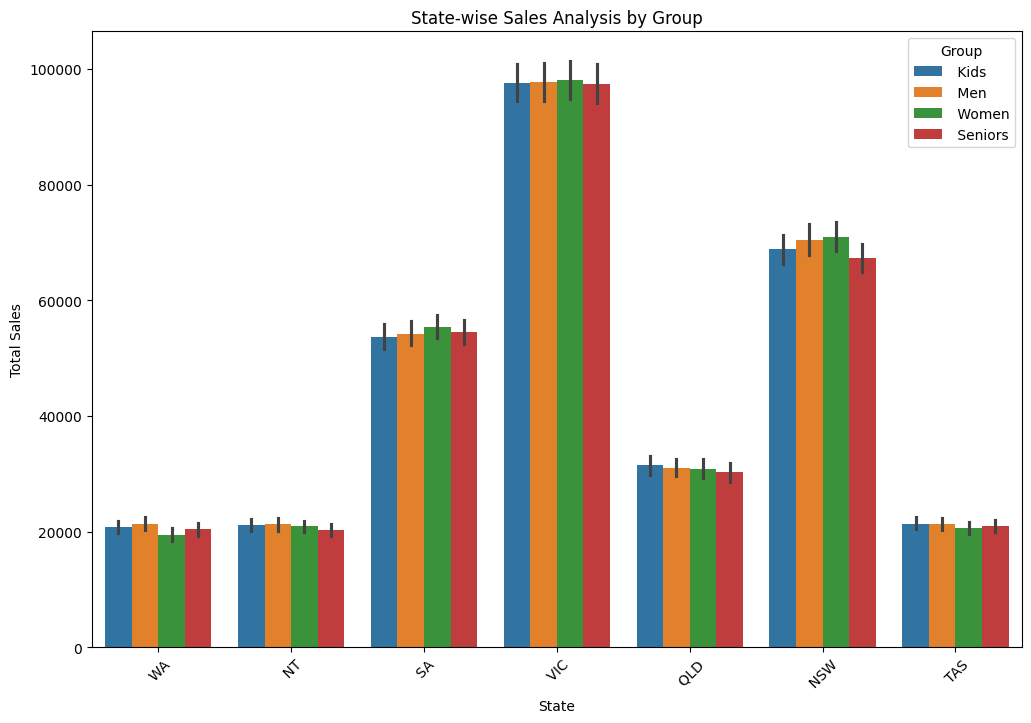

In [189]:
# Plotting state-wise sales for different demographic groups
plt.figure(figsize=(12, 8))
sns.barplot(data=data_cleaned, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis by Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.show()

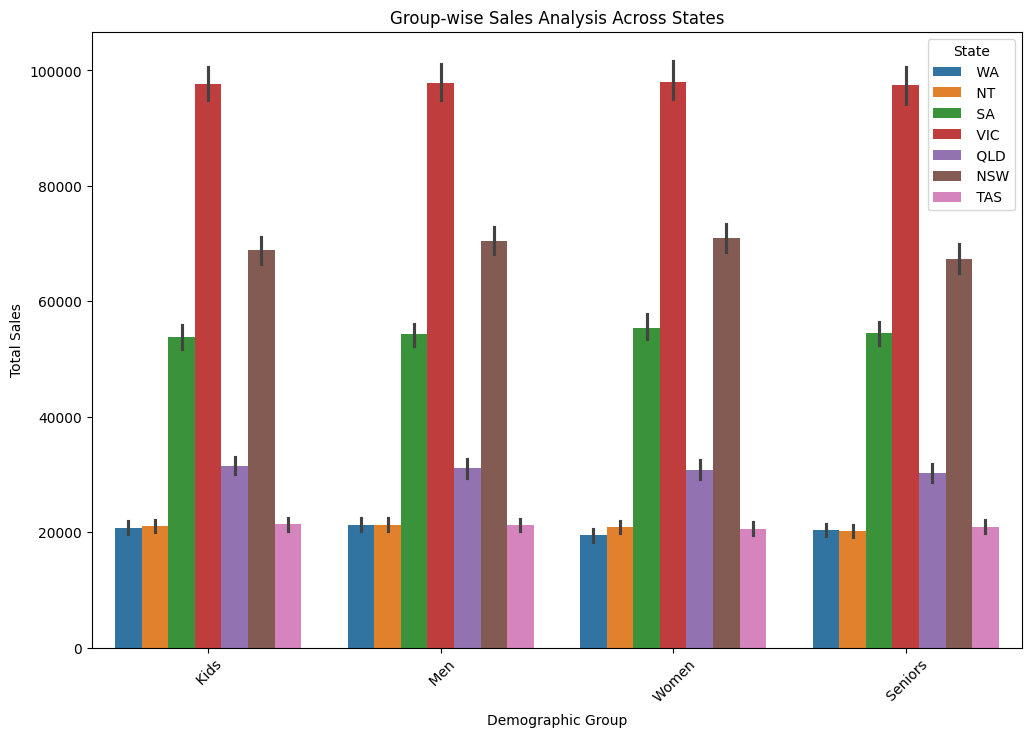

In [190]:
# Plotting group-wise sales across states
plt.figure(figsize=(12, 8))
sns.barplot(data=data_cleaned, x='Group', y='Sales', hue='State')
plt.title('Group-wise Sales Analysis Across States')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.show()

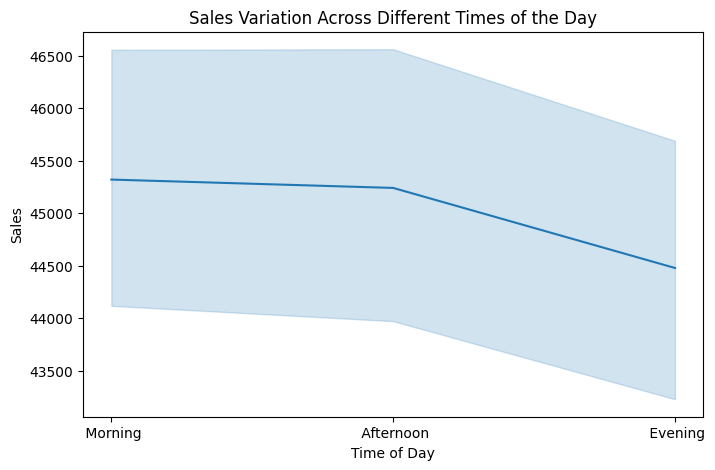

In [191]:

## Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Sales', data=data_cleaned)
plt.title('Sales Variation Across Different Times of the Day')
plt.ylabel('Sales')
plt.xlabel('Time of Day')
plt.show()

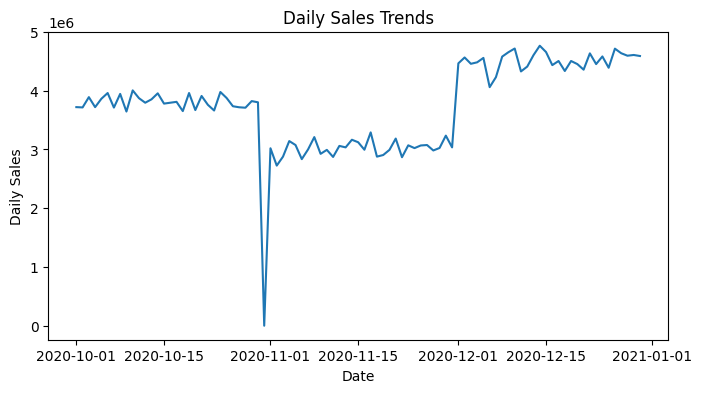

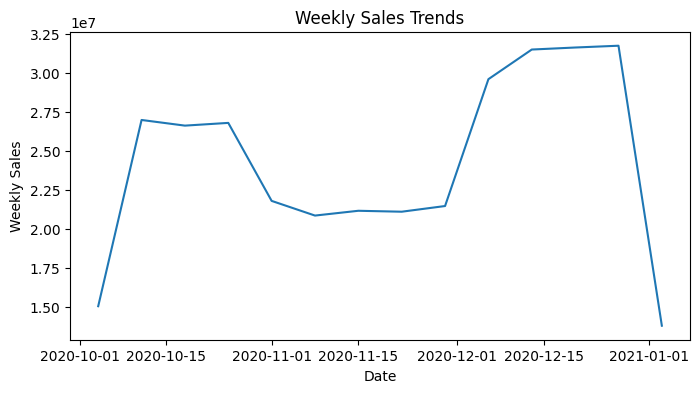

/var/folders/7y/bflqb96959vgktr703vv6mcm0000gp/T/ipykernel_24047/3603360902.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_cleaned['Sales'].resample('M').sum()


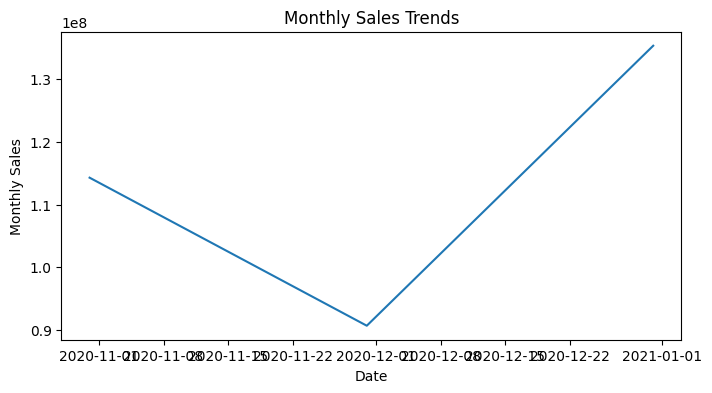

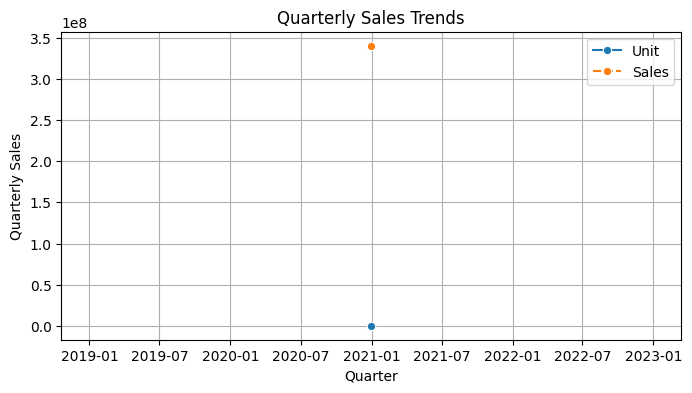

In [192]:
# b. The dashboard must contain daily, weekly, monthly, and quarterly charts. 

if data_cleaned.index.name != 'Date':
    data_cleaned.set_index('Date', inplace=True)
# Daily sales
daily_sales = data_cleaned['Sales'].resample('D').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=daily_sales)
plt.title('Daily Sales Trends')
plt.ylabel('Daily Sales')
plt.xlabel('Date')
plt.show()

# Weekly sales
weekly_sales = data_cleaned['Sales'].resample('W').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Trends')
plt.ylabel('Weekly Sales')
plt.xlabel('Date')
plt.show()

# Monthly sales
monthly_sales = data_cleaned['Sales'].resample('M').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()

# Plotting the quarterly data
plt.figure(figsize=(8, 4))
sns.lineplot(data=quarterly_s, marker='o')  # Adding marker='o' to show the point clearly
plt.title('Quarterly Sales Trends')
plt.ylabel('Quarterly Sales')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()
